<a href="https://colab.research.google.com/github/Sa1syo/NLTK/blob/main/IRNLP2019_Ex02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2. Accessing Text Corpora and Lexicl Resources

For International Students: goto http://www.nltk.org/book/ch02.html  
Almost corresponded without Lesson 1.  
Lesson 2 and 3 is mapped section 1 and 2 in the page.  
Lesson 1 is mapped as section 3.  
Lesson 4 is same.


NLTKの中には既にパージング済みのテキストコーパスと語彙リソースが含まれています。これらを用いることで、自分で生の文書データを収集してタグ付けするよりもはるかに早く自然言語処理を体験することができます。  
この章の内容を始める前に、Pythonのスクリプトの書き方と管理方法について学習しましょう。

## Lesson 1. Python scripting

Pythonは対話式 (Interactive Mode) による動作と、スクリプトによる動作があります。さらに、PythonはC等と同様にコンパイルしてバイナリ化する動作もあります。今回は、スクリプトによる動作について学びます。  
We learn about scripting on the Python today.

### 1.1 Editing python

C言語の記述は \*.c, Javaでは \*.javaと、拡張子が指定されていますが、Pythonスクリプトは \*.py という拡張子で保存します。  
スクリプトの書き方にはいくつかのパターンがありますが、一番簡単な方法は、手続きを逐次に記述する『逐次型』の記述です。
なお、Pythonスクリプトに日本語を記述したい場合は、Python 2の場合は必ず行頭に  
 - \# coding: utf-8
 
と記述します。Python 3では特に必要はないようです（デフォルトがUTF-8のため）。 Emacsでは、

 - -\*- coding:utf-8 -\*-

と書く必要があります。

In [ ]:
# coding: utf-8
# sequence.py
print("Hello, World!")

Hello, World!


上記コード (sequence.py) を実行するときには、当該のPythonスクリプトのあるディレクトリに移動して、以下のようにターミナルから実行します。

% python sequence.py

Hello, World!

In [ ]:
# coding: utf-8
# sequence2.py
import nltk
nltk.download('all')
from nltk.book import *

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


★ (Assignment Remark) 下のコードは前回の演習の中のコードですが、逐次型であれば、そのまま列挙してファイルにすることができます。

In [ ]:
# 重要な文章特徴量を関数として定義
# 文書中の単語の多様性尺度
def lexical_diversity(text):
    return len(set(text)) / (1.0 * len(text))

# text3 の多様性尺度
print("text3: ", lexical_diversity(text3))
# text5 の多様性尺度
print("text5: ", lexical_diversity(text5))

# text1の重複無しの単語リストを取得
V = set(text1)
# 長い単語 (15文字以上) を抽出
long_words = [w for w in V if len(w) > 15]
# ソートしたリストを出力
print(sorted(long_words))

text3:  0.06230453042623537
text5:  0.13477005109975562
['CIRCUMNAVIGATION', 'Physiognomically', 'apprehensiveness', 'cannibalistically', 'characteristically', 'circumnavigating', 'circumnavigation', 'circumnavigations', 'comprehensiveness', 'hermaphroditical', 'indiscriminately', 'indispensableness', 'irresistibleness', 'physiognomically', 'preternaturalness', 'responsibilities', 'simultaneousness', 'subterraneousness', 'supernaturalness', 'superstitiousness', 'uncomfortableness', 'uncompromisedness', 'undiscriminating', 'uninterpenetratingly']


その他、幾つかの方法がありますが、『関数＋実行文』、『インポート時の実行回避を含むmain()関数』等があります。この、『インポート時の実行回避を含むmain()関数』の記述は下のようになります。

In [ ]:
# main.py

# define at first
def main():
    print("text3: ", lexical_diversity(text3))
    
# 重要な文章特徴量を関数として定義
# 文書中の単語の多様性尺度
def lexical_diversity(text):
    return len(set(text)) / (1.0 * len(text))


# 最後に呼び出す
if __name__ == "__main__":
    main()

text3:  0.06230453042623537


この時に、main()関数の前に付属している 'if \_\_name\_\_ == "\_\_main\_\_":' の表現は、もしファイル main.py を外部からimportしようとしたときに、勝手に実行されないようにするためのものです。この表現が無い場合は、逐次処理の中で、main()関数が勝手に呼び出されてしまいます。

### 1.1.2. Import python script

既に、import文や from - import 文を用いて、外部のライブラリを取り込む (NLTK) 操作を体験していますが、このimportは、スクリプトとして作成したプログラムを取り込むことが可能になるものです。先に作成したmain.pyをimportして、その中に含まれるlexical_diversity()関数を利用してみましょう。 (先に、上記のmain.pyを予め作成して、保存しておいてください)   
利用するには、import mainと記述した後、 main.* という形で、『モジュールの中の関数』と言う形で呼び出してください。

注意) Google Colabでは、いくつか方法はあるのですが、先んじてmain.pyをUploadしておく方法として、以下のコードを走らせ、Uploaderを通してmain.pyをUploadしておくと、動作できます。

In [ ]:
import sys
if 'google.colab' in sys.modules:
    from google.colab import files
    print( files.upload())
    


Saving TREE.png to TREE.png
{'TREE.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x11\xaa\x00\x00\x06\xd7\x08\x06\x00\x00\x00\x86b\xe4\xac\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00Y\xb7tEXtmxfile\x00%3Cmxfile%20host%3D%22embed.diagrams.net%22%20modified%3D%222022-11-16T08%3A14%3A30.813Z%22%20agent%3D%225.0%20(Windows%20NT%2010.0%3B%20Win64%3B%20x64)%20AppleWebKit%2F537.36%20(KHTML%2C%20like%20Gecko)%20Chrome%2F107.0.0.0%20Safari%2F537.36%20Edg%2F107.0.1418.26%22%20etag%3D%22OZDQYHn0ZrvXCsbXg0Lc%22%20version%3D%2220.5.3%22%20type%3D%22embed%22%3E%3Cdiagram%20id%3D%22v4wBkQS-bMfVoX0DzswC%22%20name%3D%22%E3%83%9A%E3%83%BC%E3%82%B81%22%3E7X3tc%2BM2kvdfo6rdD54iSIIEPlK2nM1zyd1UnKd296PG1kx867F8smYzc3%2F9ESABkeiWRMlkgxScSiUS30Q3ft3o954l11%2B%2F%2F7RZvvzx6%2Fph9TSLo4fvs%2BRmFseJSNPyf%2BrIj%2BpInmbVgS%2Bbx4fqENsduHv831V9MKqPfnt8WL22Ltyu10%2Fbx5f2wfv18%2FPqfts6ttxs1n%2B2L%2Fu8fmr%2F6svyywocuLtfPsGjf3982P5RHRVxvjv%2Bt9Xjlz%2FML7NMVme%2BLs3F9V%2Fy%2BsfyYf1n41CymCXXm%2FV6W336%2Bv169aSIZ%2

In [ ]:
import main

print("text3: ", main.lexical_diversity(text3))

text3:  0.06230453042623537


このように、スクリプトを記述しておけば、後でモジュールとして扱うことができます。このため、Pythonのスクリプトを作成することをモジュール化とも言います。  

対話式のインターフェースでは、何か異常があった場合、それまでずっと行ってきた蓄積が無駄になってしまうことがあります。そのため、Pythonスクリプトを作成してモジュール化しておくことで、対話式でテストしてきた結果を保存し、後で利用することができます。


## Lesson 2. Accessing Text Corpora

それでは、今回の本論について説明します。先ずは、テキストコーパスの利用法です。NLTKには種々のテキストコーパスがあります。
![image.png](attachment:image.png)
上記表の中に含まれる幾つかのコーパスの利用方法を見ます。

### 2.1. Gutenberg Corpus

NLTKには、http://www.gutenberg.org/ でホストされている約25,000の無料の電子書籍を含むProject Gutenberg電子テキストアーカイブから、幾つかの文書をピックアップして利用できるように整理されています。利用するには、NLTKのパッケージをImportさせてから、このコーパス内のファイル識別子であるnltk.corpus.gutenberg.fileids()を呼び出します。

In [ ]:
import nltk
print(nltk.corpus.gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


★ (Assignment Remark) この中に含まれている 'austen-emma.txt' を選択して読み込み、内包する単語数を調べてみましょう。

In [ ]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
print(len(emma))

192427


なお、corpus内のgutenbergモジュールをimportするように書き換えると、記述が短くなります。

In [ ]:
from nltk.corpus import gutenberg
print(gutenberg.fileids())
emma = gutenberg.words('austen-emma.txt')
print(len(emma))

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']
192427


続いて、全てのフィールドを読み込み、各テキストの統計を出すプログラムを書いてみましょう。この中で表示する統計は、平均単語長, 平均文長, 語彙多様性スコアです。出力するのに少々時間が掛かりますので、対話式のインターフェースよりは、スクリプトを作成して実行してみてください。

In [ ]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

5 25 26 austen-emma.txt
5 26 17 austen-persuasion.txt
5 28 22 austen-sense.txt
4 34 79 bible-kjv.txt
5 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 18 12 burgess-busterbrown.txt
4 20 13 carroll-alice.txt
5 20 12 chesterton-ball.txt
5 23 11 chesterton-brown.txt
5 18 11 chesterton-thursday.txt
4 21 25 edgeworth-parents.txt
5 26 15 melville-moby_dick.txt
5 52 11 milton-paradise.txt
4 12 9 shakespeare-caesar.txt
4 12 8 shakespeare-hamlet.txt
4 12 7 shakespeare-macbeth.txt
5 36 12 whitman-leaves.txt


gutenbergモジュール内には、文書内の各文に含まれる単語リストを抽出するsents()関数が存在します。各文がリスト化されており、その要素に単語リストが設定されている形になります。抽出した文リストを用いると、各文の単語数や、単語数が一番多い文の抽出などが行えます。

In [ ]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')
# 0から4までの文の表示
print('sents 0 to 4 : ', macbeth_sentences[0:4])
# 1116行目の文の表示
print('sents 1116 : ',macbeth_sentences[1116])
# 各文における最大の単語数の抽出と、単語数最大の文を表示
longest_len = max(len(s) for s in macbeth_sentences)
print('longest sentence : ', [s for s in macbeth_sentences if len(s) == longest_len])

sents 0 to 4 :  [['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ['Scoena', 'Prima', '.'], ['Thunder', 'and', 'Lightning', '.']]
sents 1116 :  ['Double', ',', 'double', ',', 'toile', 'and', 'trouble', ';', 'Fire', 'burne', ',', 'and', 'Cauldron', 'bubble']
longest sentence :  [['Doubtfull', 'it', 'stood', ',', 'As', 'two', 'spent', 'Swimmers', ',', 'that', 'doe', 'cling', 'together', ',', 'And', 'choake', 'their', 'Art', ':', 'The', 'mercilesse', 'Macdonwald', '(', 'Worthie', 'to', 'be', 'a', 'Rebell', ',', 'for', 'to', 'that', 'The', 'multiplying', 'Villanies', 'of', 'Nature', 'Doe', 'swarme', 'vpon', 'him', ')', 'from', 'the', 'Westerne', 'Isles', 'Of', 'Kernes', 'and', 'Gallowgrosses', 'is', 'supply', "'", 'd', ',', 'And', 'Fortune', 'on', 'his', 'damned', 'Quarry', 'smiling', ',', 'Shew', "'", 'd', 'like', 'a', 'Rebells', 'Whore', ':', 'but', 'all', "'", 's', 'too', 'weake', ':', 'For', 'braue', 'Macbeth', '(', 'well

### 2.2. Web and Chat Text

WebとChat文のコレクションは、Project Gutenbergのような文学的な表現ではなく、いわゆる『一般的な表現』の抽出に役立ちます。 NLTKのWebテキストコレクションには、Firefoxディスカッションフォーラムのコンテンツ、ニューヨークで聞かれた会話、パイレーツオブザカリビアンの映画脚本、個人広告、ワインレビュー等が含まれます。

In [ ]:
from nltk.corpus import webtext
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


また、元々はインターネット捕食者の自動検出に関する研究のために海軍大学院で収集された、インスタントメッセージングチャットセッションのコーパスも存在します。 コーパスには10,000を超える投稿が含まれており、ユーザー名を「UserNNN」という形式の一般名に置き換えて匿名化し、他の識別情報を削除するために手動で編集します。 コーパスは15のファイルで構成され、各ファイルには、特定の日付に収集された数百の投稿が含まれ、年齢別のチャットルーム（10代、20代、30代、40代、および一般的な大人のチャットルーム）が含まれます。 ファイル名には、日付、チャットルーム、投稿数が含まれます。 たとえば、10-19-20s_706posts.xmlには、2006年10月19日に20代のチャットルームから収集された706件の投稿が含まれています。

In [ ]:
from nltk.corpus import nps_chat
chatroom = nps_chat.posts('10-19-20s_706posts.xml')
print(chatroom[120:125])

[['yeee', 'haw', 'U30'], ['im', 'considering', 'changing', 'my', 'nickname', 'to', '"', 'ihavehotnips', '"'], ['JOIN'], ['i', 'do', "n't", 'want', 'hot', 'pics', 'of', 'a', 'female', ',', 'I', 'can', 'look', 'in', 'a', 'mirror', '.'], ['hi', 'U64']]


### 2.3. Brown Corpus

★ (Assignment Remark) ブラウンコーパスは、1961年にブラウン大学で作成された最初の数百万語の英語の電子コーパスです。 このコーパスには500のソースからのテキストが含まれており、ソースはニュース、社説などのジャンル別に分類されています。含まれるリストについては以下のリンクを参照してください。  
https://www.nltk.org/book/ch02.html#tab-brown-sources

In [ ]:
from nltk.corpus import brown
# categoriesの表示
print(brown.categories(),'\n')
# File IDの表示
print(brown.fileids()[1:100],'\n')
# 'news'カテゴリーに含まれる単語のリスト
print(brown.words(categories='news')[1:100],'\n')
# 'cg22'ファイルIDに含まれる単語のリスト
print(brown.words(fileids=['cg22'])[1:100],'\n')
# 'news', 'editorial', 'reviews' カテゴリーに含まれる文のリスト
print(brown.sents(categories=['news', 'editorial', 'reviews'])[0:3])

['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction'] 

['ca02', 'ca03', 'ca04', 'ca05', 'ca06', 'ca07', 'ca08', 'ca09', 'ca10', 'ca11', 'ca12', 'ca13', 'ca14', 'ca15', 'ca16', 'ca17', 'ca18', 'ca19', 'ca20', 'ca21', 'ca22', 'ca23', 'ca24', 'ca25', 'ca26', 'ca27', 'ca28', 'ca29', 'ca30', 'ca31', 'ca32', 'ca33', 'ca34', 'ca35', 'ca36', 'ca37', 'ca38', 'ca39', 'ca40', 'ca41', 'ca42', 'ca43', 'ca44', 'cb01', 'cb02', 'cb03', 'cb04', 'cb05', 'cb06', 'cb07', 'cb08', 'cb09', 'cb10', 'cb11', 'cb12', 'cb13', 'cb14', 'cb15', 'cb16', 'cb17', 'cb18', 'cb19', 'cb20', 'cb21', 'cb22', 'cb23', 'cb24', 'cb25', 'cb26', 'cb27', 'cc01', 'cc02', 'cc03', 'cc04', 'cc05', 'cc06', 'cc07', 'cc08', 'cc09', 'cc10', 'cc11', 'cc12', 'cc13', 'cc14', 'cc15', 'cc16', 'cc17', 'cd01', 'cd02', 'cd03', 'cd04', 'cd05', 'cd06', 'cd07', 'cd08', 'cd09', 'cd10', 'cd11', 'cd12'] 

['Fulton', 'County', '

ブラウンコーパスは、ジャンル間の体系的な違いを研究するのに便利なリソースであり、スタイル分析として知られる言語学的調査の一種です。例えば、筆者毎の文体の違い等を見る為には、機能語と呼ばれるcan, could, may などの語の統計的な使用頻度を見ることによってそれを調べることができます。以下の例は、それらの機能語に関する頻度を抽出するコードです。

In [ ]:
from nltk.corpus import brown
news_text = brown.words(categories='news')
fdist = nltk.FreqDist(w.lower() for w in news_text)
modals = ['can', 'could', 'may', 'might', 'must', 'will']
for m in modals:
     print(m + ':', fdist[m], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

★ (Assignment Remark) これを、興味のあるジャンルに対してそれぞれ掛けて、条件付きの頻度分布を提示することで、機能語の頻度の違いから、その文書の時制や可能等の傾向を見ることができます。なお、条件付き頻度分布の計算は、NLTKのサポートで構築することができます。

In [ ]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


### EXERCISE ATTENDANCE: 
please check the conditional frequency distribution of some functional words such as "in", "on", "at", "who", "what", "when", "why", "to" and "for" for genres "news", "religion", "hobbies", "science_fiction", "romance" and "humor" using previous example.

                  in   on   at  who what when  why   to  for 
           news 1893  657  598  268   76  128    9 2116  943 
       religion  724  160  114  100   64   53   14  882  283 
        hobbies 1427  515  328  103   78  119   10 1797  776 
science_fiction  152   85   51   13   27   21    4  305   92 
        romance  875  362  402   89  121  126   34 1502  410 
          humor  334  128  100   48   36   52    9  463  150 

### 2.4. Reuter Corpus
Reuters Corpusには、合計130万語の10,788のニュース文書が含まれています。文書は90のトピックに分類され、「トレーニング」と「テスト」と呼ばれる2つのセットにグループ分けされています。
Reutersコーパス内のカテゴリは、ニュース・ストーリーが複数のトピックをカバーすることが多いため、互いに重複しています。
同様に、ファイルやカテゴリの観点から、必要な単語や文を指定することができます。

In [ ]:
from nltk.corpus import reuters

# File IDリストの取得
print(reuters.fileids()[0:100], '\n')
# Categoryリストの取得
print(reuters.categories(), '\n')
# 'training/9865' ファイルに含まれるCategoryリストの取得
print(reuters.categories('training/9865'), '\n')
# 'training/9865', training/9880'ファイルに含まれるCategoryリストの取得
print(reuters.categories(['training/9865', 'training/9880']), '\n')
# 'barley'カテゴリを含むfile ID リストの取得
print(reuters.fileids('barley'), '\n')
# 'barley' または 'corn' カテゴリを含むfile ID リストの取得
print(reuters.fileids(['barley', 'corn'])[:30], '\n')
# 'training/9865'ファイル内の単語リストの取得
print(reuters.words('training/9865')[:], '\n')
# 'training/9865', 'training/9880' ファイル内の単語リストの取得
print(reuters.words(['training/9865', 'training/9880'])[:30], '\n')
# 'barley' カテゴリに含まれるDocument内に含まれる単語リストの取得
print(reuters.words(categories='barley')[:30], '\n')
# 'barley' または 'corn' カテゴリに含まれるDocument内に含まれる単語リストの取得
print(reuters.words(categories=['barley', 'corn'])[:30])

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833', 'test/14839', 'test/14840', 'test/14841', 'test/14842', 'test/14843', 'test/14844', 'test/14849', 'test/14852', 'test/14854', 'test/14858', 'test/14859', 'test/14860', 'test/14861', 'test/14862', 'test/14863', 'test/14865', 'test/14867', 'test/14872', 'test/14873', 'test/14875', 'test/14876', 'test/14877', 'test/14881', 'test/14882', 'test/14885', 'test/14886', 'test/14888', 'test/14890', 'test/14891', 'test/14892', 'test/14899', 'test/14900', 'test/14903', 'test/14904', 'test/14907', 'test/14909', 'test/14911', 'test/14912', 'test/14913', 'test/14918', 'test/14919', 'test/14921', 'test/14922', 'test/14923', 'test/14926', 'test/14928', 'test/14930', 'test/14931', 'test/14932', 'test/14933', 'test/14934', 'test/14941', 'test/14943', 'test/14949', 'test/14951', 'test/14954', 'test/14957', 'test/14958', 'test/14959', 'test/14960', 'test/14962', 'test/14963', 'test/14964', 'test/14965', 'test/14967', 'test/14968', 'test

### 2.5.  Inaugural Address Corpus

Inaugural Address Corpusは、米国大統領の就任演説をテキスト化したものです。全部で55のテキストがあり、それぞれが行われた時間が追加データとして付与されています。

In [ ]:
from nltk.corpus import inaugural

# File IDリストの抽出
print(inaugural.fileids(),'\n')
# 大統領就任演説の行われた年を抽出したリストの表示
print([fileid[:4] for fileid in inaugural.fileids()])

['1789-Washington.txt', '1793-Washington.txt', '1797-Adams.txt', '1801-Jefferson.txt', '1805-Jefferson.txt', '1809-Madison.txt', '1813-Madison.txt', '1817-Monroe.txt', '1821-Monroe.txt', '1825-Adams.txt', '1829-Jackson.txt', '1833-Jackson.txt', '1837-VanBuren.txt', '1841-Harrison.txt', '1845-Polk.txt', '1849-Taylor.txt', '1853-Pierce.txt', '1857-Buchanan.txt', '1861-Lincoln.txt', '1865-Lincoln.txt', '1869-Grant.txt', '1873-Grant.txt', '1877-Hayes.txt', '1881-Garfield.txt', '1885-Cleveland.txt', '1889-Harrison.txt', '1893-Cleveland.txt', '1897-McKinley.txt', '1901-McKinley.txt', '1905-Roosevelt.txt', '1909-Taft.txt', '1913-Wilson.txt', '1917-Wilson.txt', '1921-Harding.txt', '1925-Coolidge.txt', '1929-Hoover.txt', '1933-Roosevelt.txt', '1937-Roosevelt.txt', '1941-Roosevelt.txt', '1945-Roosevelt.txt', '1949-Truman.txt', '1953-Eisenhower.txt', '1957-Eisenhower.txt', '1961-Kennedy.txt', '1965-Johnson.txt', '1969-Nixon.txt', '1973-Nixon.txt', '1977-Carter.txt', '1981-Reagan.txt', '1985-Reaga

大統領演説の中で、'america' と 'citizen' がどのくらい使われたのかを、条件付き頻度分布でプロットすると、米国における大統領及び国民の関心がどちらにあるのかが判別できます。

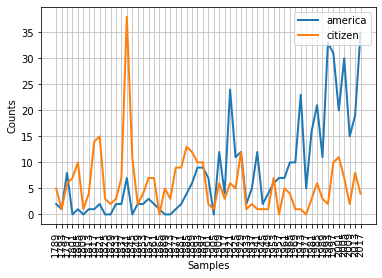

None


In [ ]:
cfd = nltk.ConditionalFreqDist(
         (target, fileid[:4])
         for fileid in inaugural.fileids()
         for w in inaugural.words(fileid)
         for target in ['america', 'citizen']
         if w.lower().startswith(target))
print(cfd.plot())

### 2.6. Other language corpus

NLTKには英語以外の多くの言語用のコーパスも付属しています。しかしながら、利用する場合には、Python上の文字エンコーディングを操作する方法を学習する必要がある場合があります。会津大の環境では、基本的にはUTF-8を利用するので、凡その言語には対応されます。

In [ ]:
nltk.download('all')
# スペイン語コーパス
print(nltk.corpus.cess_esp.words())
# ポルトガル語コーパス
print(nltk.corpus.floresta.words())
# ヒンドゥー語コーパス
print(nltk.corpus.indian.words('hindi.pos'))
# 世界人権宣言コーパス内の言語IDリスト
print(nltk.corpus.udhr.fileids()[:20])
# 世界人権宣言コーパス内の 'ラテン文字ジャワ語' 単語リスト
print(nltk.corpus.udhr.words('Javanese-Latin1')[:20])

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

上記の例の最後にある世界人権宣言コーパスには、300以上の言語で世界人権宣言が含まれています。以下はそれぞれの言語における語長の違いをプロットした例となります。

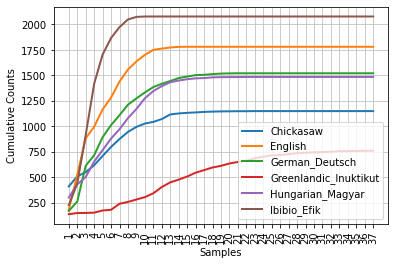

None


In [ ]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
    'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
         (lang, len(word))
         for lang in languages
         for word in udhr.words(lang + '-Latin1'))
print(cfd.plot(cumulative=True))

### 2.7. Structure of text corpus
NLTKで定義されている基本的なコーパス機能を利用すると、様々な形で利用することができます。特に、生の文章を取り出すraw()メソッド、単語リストを取り出すwords()メソッド、文リストを取り出すsents()メソッドなどがあります。
https://www.nltk.org/book/ch02.html#fig-text-corpus-structure
![image.png](attachment:image.png)

In [ ]:
# Raw Data (生の文)の読み込み
raw = gutenberg.raw("burgess-busterbrown.txt")
print('raw: ',raw[1:20], '\n')
# Word List の読み込み
words = gutenberg.words("burgess-busterbrown.txt")
print('words: ',words[1:20], '\n')
# Sentence List の読み込み
sents = gutenberg.sents("burgess-busterbrown.txt")
print('sents: ',sents[1:10])

raw:  The Adventures of B 

words:  ['The', 'Adventures', 'of', 'Buster', 'Bear', 'by', 'Thornton', 'W', '.', 'Burgess', '1920', ']', 'I', 'BUSTER', 'BEAR', 'GOES', 'FISHING', 'Buster', 'Bear'] 

sents:  [['I'], ['BUSTER', 'BEAR', 'GOES', 'FISHING'], ['Buster', 'Bear', 'yawned', 'as', 'he', 'lay', 'on', 'his', 'comfortable', 'bed', 'of', 'leaves', 'and', 'watched', 'the', 'first', 'early', 'morning', 'sunbeams', 'creeping', 'through', 'the', 'Green', 'Forest', 'to', 'chase', 'out', 'the', 'Black', 'Shadows', '.'], ['Once', 'more', 'he', 'yawned', ',', 'and', 'slowly', 'got', 'to', 'his', 'feet', 'and', 'shook', 'himself', '.'], ['Then', 'he', 'walked', 'over', 'to', 'a', 'big', 'pine', '-', 'tree', ',', 'stood', 'up', 'on', 'his', 'hind', 'legs', ',', 'reached', 'as', 'high', 'up', 'on', 'the', 'trunk', 'of', 'the', 'tree', 'as', 'he', 'could', ',', 'and', 'scratched', 'the', 'bark', 'with', 'his', 'great', 'claws', '.'], ['After', 'that', 'he', 'yawned', 'until', 'it', 'seemed', 'as',

### 2.9 Loading your own Corpus

英語の文書であれば、独自のデータをコーパスとして読み込むことも、NLTKでは可能です。Plaintext Corpus Readerは、特定のフォルダに収納されている生の文書データをコーパスとして扱えるようにパージングして提供します。

    PlaintextCorpusReader:
        >>> from nltk.corpus import PlaintextCorpusReader
        >>> corpus_root = '/usr/share/dict'
        >>> wordlists = PlaintextCorpusReader(corpus_root, '.*') 
        >>> wordlists.fileids()
        ['README', 'connectives', 'propernames', 'web2', 'web2a', 'words']
        >>> wordlists.words('connectives')
        ['the', 'of', 'and', 'to', 'a', 'in', 'that', 'is', ...]

Bracket Parse Corpus Readerは、後の回に学習しますが、括弧書きによるパージング済データを読み込み、コーパスとして扱えるように提供します。

    BracketParseCorpusReader:　（Penn Treebankを用いて）
        >>> from nltk.corpus import BracketParseCorpusReader
        >>> corpus_root = r"C:\corpora\penntreebank\parsed\mrg\wsj" [1]
        >>> file_pattern = r".*/wsj_.*\.mrg" [2]
        >>> ptb = BracketParseCorpusReader(corpus_root, file_pattern)
        >>> ptb.fileids()
        ['00/wsj_0001.mrg', '00/wsj_0002.mrg', '00/wsj_0003.mrg', '00/wsj_0004.mrg', ...]
        >>> len(ptb.sents())
        49208

なお、いずれのコーパスリーダーも、corpus_rootとしてディレクトリを指定する必要があります。そのため、WindowsやUnixのディレクトリ構成に応じたファイル位置を指定する必要があります。

## Lesson 3. Conditional Frequency Distribution
![image.png](attachment:image.png)

それでは、コーパスに含まれるテキストコレクションを用いて、統計情報を抽出する手順を勉強しましょう。今回は、単語数をカウントする（条件付き頻度分布)事を例として見ていきます。

### 3.1. 条件とイベント

データの形式を考えるときに、その単語がどのカテゴリに含まれているのか、と言う情報を付与しておく必要があるケースがあります。例えば、下記の例 text は、あるニュースの中に内包される単語のリストですが、その単語1つ1つに『news』というカテゴリーを付与すると、タプルの表現を使って、ペアリングして表現する事が出来ます。

In [ ]:
# text: 一連の単語のリスト
text = ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...] 
# pairs: ペアリングして表現
pairs = [('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ...]

### 3.2. Counting words by genre

実際にブラウンコーパス内に含まれるカテゴリをジャンルとして扱い、ジャンル毎の語彙統計を取得してみましょう。ここでは、以下のメソッドを利用します。

- FreqDist() 入力として単純なリスト。
- ContitionalFreqDist() ペアのリストを取る

In [ ]:
from nltk.corpus import brown
cfd = nltk.ConditionalFreqDist(
    (genre, word) # Pair definition
    for genre in brown.categories() # genre information from brown.categories()
    for word in brown.words(categories=genre)) # word informatoin from brown categories()

ここで、各データのカテゴリを抽出するところや、各カテゴリ内の単語リストを抽出するときに、for - in 構文で非常に簡単に処理を記述できている事に注目してください。CやJavaでは、内包するデータのループを、Indexで定義したり、比較して特定の配列に入れたりと大忙しでしたが、Pythonではそれぞれ1行ずつ簡単に書けてしまいます。  
抽出された genre, word各リストを用いて、ペアリング表現を抽出し、特に news と romance カテゴリに含まれる "genre" カテゴリ内に入っている単語を再抽出するコードを書くと次のようになります。

In [ ]:
genre_word = [(genre, word) 
              for genre in ['news', 'romance']
              for word in brown.words(categories=genre)]
print(len(genre_word))
print(genre_word[:4])

170576
[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]


このgenre_wordの中の要素をそれぞれNLTKのメソッドConditionalFreqDistを用いて『条件付き頻度分布』を取得する。

In [ ]:
cfd = nltk.ConditionalFreqDist(genre_word)
print(cfd)
print(cfd.conditions())
print('news:', cfd['news'])
print('romance:', cfd['romance'])

<ConditionalFreqDist with 2 conditions>
['news', 'romance']
news: <FreqDist with 14394 samples and 100554 outcomes>
romance: <FreqDist with 8452 samples and 70022 outcomes>


取得した条件付き頻度分布から、romanceデータに内包される頻度のうち上位20を表示することや、romanceデータに含まれるcloudという単語の数を参照することが出来る。

In [ ]:
print(cfd['romance'].most_common(20))
print('romance could: ', cfd['romance']['could'])

[(',', 3899), ('.', 3736), ('the', 2758), ('and', 1776), ('to', 1502), ('a', 1335), ('of', 1186), ('``', 1045), ("''", 1044), ('was', 993), ('I', 951), ('in', 875), ('he', 702), ('had', 692), ('?', 690), ('her', 651), ('that', 583), ('it', 573), ('his', 559), ('she', 496)]
romance could:  193


### 3.3. 分布のプロットと集計
前述のConditionalFreqDist()メソッドは『条件付き頻度分布』を取得します。これは、集計やプロットに非常に便利です。例えば、以下のようなことを考えます。
- アメリカまたは市民の いずれかの単語であり、プロットされるカウントは、単語が特定のスピーチで発生した回数。

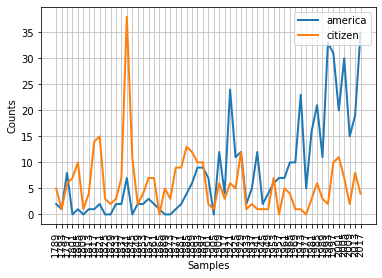

None


In [ ]:
from nltk.corpus import inaugural
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))
print(cfd.plot())

また、国連スピーチのコーパスを取得し、各言語毎の単語の長さについて、同様にCondigtionalFreqDistを用いて、傾向を知ることができます。

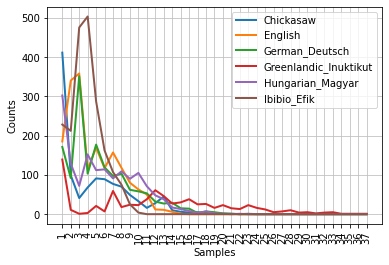

None


In [ ]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch',
             'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))
print(cfd.plot())

- なお、上記のようなデータを折れ線グラフではなく、表として直接的に出力しようとすると以下のようになります。

In [ ]:
cfd.tabulate(conditions=['English', 'German_Deutsch'],
             samples=range(10), cumulative=True)

                  0    1    2    3    4    5    6    7    8    9 
       English    0  185  525  883  997 1166 1283 1440 1558 1638 
German_Deutsch    0  171  263  614  717  894 1013 1110 1213 1275 


### 3.4. Generating Random Text with Bigram

次の例は、Bigramと呼ばれる、『連接する2語』の対応を抽出するようなコードです。文章における2語のペアは、この後の授業でも出てきますが、『ある単語が来た次の単語の予測』に使うことが出来るので、非常に重要な操作です。

In [ ]:
sent = ['In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth', '.']

In [ ]:
print(list(nltk.bigrams(sent)))

[('In', 'the'), ('the', 'beginning'), ('beginning', 'God'), ('God', 'created'), ('created', 'the'), ('the', 'heaven'), ('heaven', 'and'), ('and', 'the'), ('the', 'earth'), ('earth', '.')]


In [ ]:
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

text = nltk.corpus.genesis.words('english-kjv.txt')
bigrams = nltk.bigrams(text)
cfd = nltk.ConditionalFreqDist(bigrams)
print(cfd['living'])
generate_model(cfd, 'living')

<FreqDist with 6 samples and 16 outcomes>
living creature that he said , and the land of the land of the land 

## Lesson4. Lexical Resource
![image.png](attachment:image.png)

授業中にも説明しましたが、単語に付属する素性や品詞を扱うことは自然言語を処理するうえで非常に重要なことです。  
特に、前置詞（in, on, at)等は、文章中の意味としては弱いですが、特定の品詞に対して意味を理解する重要な単語ですし、固有名詞等はそのものずばりに意味があるので、文章の内容を要約するのに非常に重要な役割を持ちます。

語彙リソースとは、品詞・Sensing定義等の関連情報を伴う単語及びPhraseの集合体です、

### 4.1. Wordlist Corpora

次の例は、nltk.corpus.wordsの中に含まれているWordlistを用いて、登録されている語を一般語とみなし、一般語以外の語を抽出する例です。

In [ ]:
def unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab - english_vocab
    return sorted(unusual)

In [ ]:
print(unusual_words(nltk.corpus.gutenberg.words('austen-sense.txt'))[:100])

['abbeyland', 'abhorred', 'abilities', 'abounded', 'abridgement', 'abused', 'abuses', 'accents', 'accepting', 'accommodations', 'accompanied', 'accounted', 'accounts', 'accustomary', 'aches', 'acknowledging', 'acknowledgment', 'acknowledgments', 'acquaintances', 'acquiesced', 'acquitted', 'acquitting', 'acted', 'actions', 'adapted', 'adding', 'additions', 'addressed', 'addresses', 'addressing', 'adhering', 'adieus', 'adjusting', 'administering', 'admirers', 'admires', 'admitting', 'adorned', 'advances', 'advantages', 'affairs', 'affections', 'affects', 'affixed', 'afflictions', 'afforded', 'affording', 'ages', 'agitated', 'agonies', 'ailments', 'aimed', 'alarms', 'alienated', 'alighted', 'alleged', 'allenham', 'allowances', 'allowed', 'allowing', 'alluded', 'alterations', 'altered', 'altering', 'amended', 'amounted', 'amusements', 'ankles', 'annamaria', 'annexed', 'announced', 'announcing', 'annuities', 'annum', 'answered', 'answering', 'answers', 'anticipated', 'anticipating', 'antici

In [ ]:
print(unusual_words(nltk.corpus.nps_chat.words())[:100])

['aaaaaaaaaaaaaaaaa', 'aaahhhh', 'abortions', 'abou', 'abourted', 'abs', 'ack', 'acros', 'actualy', 'adams', 'adds', 'adduser', 'adjusts', 'adoted', 'adreniline', 'ads', 'adults', 'afe', 'affairs', 'affari', 'affects', 'afk', 'agaibn', 'ages', 'aggravated', 'agurlwithbigguns', 'ahah', 'ahahah', 'ahahh', 'ahahha', 'ahh', 'ahhah', 'ahhahahaha', 'ahhh', 'ahhhh', 'ahhhhhh', 'ahhhhhhhhhhhhhh', 'aiiiiiiiiiiiiiiiiiiiiiiii', 'aiken', 'aime', 'akdt', 'akon', 'akron', 'akst', 'aligator', 'allergies', 'allo', 'allowed', 'aloha', 'alohaaa', 'alohas', 'alot', 'alotta', 'alternatives', 'alterz', 'alwys', 'alzheimers', 'amazingness', 'americans', 'anithing', 'ans', 'answering', 'answers', 'antidepressants', 'anygirl', 'anymore', 'anythin', 'anytime', 'anyyyyyyyyyyyyyyyyy', 'aok', 'apoligize', 'appearently', 'appears', 'applaudes', 'appleton', 'appologise', 'appologize', 'aqwesome', 'arggghhh', 'argh', 'armtnpeat', 'arrested', 'arrived', 'arround', 'asked', 'askin', 'asking', 'asks', 'asl', 'asnwer', 

一般語とは、普段、多くの文章でよく使われる語の事です。特に、一般過ぎる語をStopwordと呼んで、文章の意味を抽出する場合には処理対象外にすることが多いです。

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('english')[:100])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once']


このStopwordを用いて、Stopword以外の語がどれだけ含まれているかの率を抽出してみましょう。

In [ ]:
def content_fraction(text):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content) / len(text)

print(content_fraction(nltk.corpus.reuters.words()))

0.735240435097661


次のような文字パズルを考えてみましょう。与えられた文字は'egivrovonl'です。これを総当たりで並び替えて、単語リストを作ることを考えます。必須文字をobligatoryとして定義し、それらを総当たりで並べ替えたときに、vのような複数ある要素があると、同じ単語が複数作られる可能性があります。それを、freqdistを用いれば、簡単に除去できます。

In [ ]:
puzzle_letters = nltk.FreqDist('egivrvonl')
obligatory = 'r'
wordlist = nltk.corpus.words.words()
print([w for w in wordlist if len(w) >= 6 and obligatory in w and nltk.FreqDist(w) <= puzzle_letters])

['glover', 'gorlin', 'govern', 'grovel', 'ignore', 'involver', 'lienor', 'linger', 'longer', 'lovering', 'noiler', 'overling', 'region', 'renvoi', 'revolving', 'ringle', 'roving', 'violer', 'virole']


そのほか、NLTKのコーパスには、個人の名前を集めたコーパスが存在します。男性名や女性名が含まれており、女性名には男性名に対して特定の語で終了する（日本語で言う～子）という特徴を見ることができます。

In [ ]:
names = nltk.corpus.names
print(names.fileids())

['female.txt', 'male.txt']


In [ ]:
male_names = names.words('male.txt')
female_names = names.words('female.txt')
# the case of same spell in male and female
print([w for w in male_names if w in female_names])

['Abbey', 'Abbie', 'Abby', 'Addie', 'Adrian', 'Adrien', 'Ajay', 'Alex', 'Alexis', 'Alfie', 'Ali', 'Alix', 'Allie', 'Allyn', 'Andie', 'Andrea', 'Andy', 'Angel', 'Angie', 'Ariel', 'Ashley', 'Aubrey', 'Augustine', 'Austin', 'Averil', 'Barrie', 'Barry', 'Beau', 'Bennie', 'Benny', 'Bernie', 'Bert', 'Bertie', 'Bill', 'Billie', 'Billy', 'Blair', 'Blake', 'Bo', 'Bobbie', 'Bobby', 'Brandy', 'Brett', 'Britt', 'Brook', 'Brooke', 'Brooks', 'Bryn', 'Cal', 'Cam', 'Cammy', 'Carey', 'Carlie', 'Carlin', 'Carmine', 'Carroll', 'Cary', 'Caryl', 'Casey', 'Cass', 'Cat', 'Cecil', 'Chad', 'Chris', 'Chrissy', 'Christian', 'Christie', 'Christy', 'Clair', 'Claire', 'Clare', 'Claude', 'Clem', 'Clemmie', 'Cody', 'Connie', 'Constantine', 'Corey', 'Corrie', 'Cory', 'Courtney', 'Cris', 'Daffy', 'Dale', 'Dallas', 'Dana', 'Dani', 'Daniel', 'Dannie', 'Danny', 'Darby', 'Darcy', 'Darryl', 'Daryl', 'Deane', 'Del', 'Dell', 'Demetris', 'Dennie', 'Denny', 'Devin', 'Devon', 'Dion', 'Dionis', 'Dominique', 'Donnie', 'Donny', 'Do

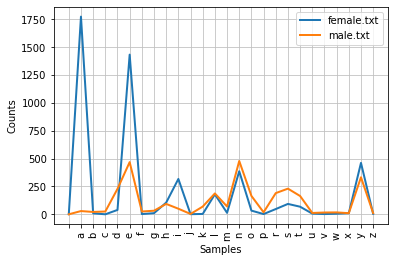

None


In [ ]:
cfd = nltk.ConditionalFreqDist(
        (fileid, name[-1])
        for fileid in names.fileids()
        for name in names.words(fileid))
print(cfd.plot())

### 4.3. Comparative Wordlist
Swadesh Wordlists: 基礎語彙を集めた様々なリストの一種

In [ ]:
from nltk.corpus import swadesh
print(swadesh.fileids())
print(swadesh.words('en'))

fr2en = swadesh.entries(['fr', 'en'][:10])
print(fr2en)

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']
['I', 'you (singular), thou', 'he', 'we', 'you (plural)', 'they', 'this', 'that', 'here', 'there', 'who', 'what', 'where', 'when', 'how', 'not', 'all', 'many', 'some', 'few', 'other', 'one', 'two', 'three', 'four', 'five', 'big', 'long', 'wide', 'thick', 'heavy', 'small', 'short', 'narrow', 'thin', 'woman', 'man (adult male)', 'man (human being)', 'child', 'wife', 'husband', 'mother', 'father', 'animal', 'fish', 'bird', 'dog', 'louse', 'snake', 'worm', 'tree', 'forest', 'stick', 'fruit', 'seed', 'leaf', 'root', 'bark (from tree)', 'flower', 'grass', 'rope', 'skin', 'meat', 'blood', 'bone', 'fat (noun)', 'egg', 'horn', 'tail', 'feather', 'hair', 'head', 'ear', 'eye', 'nose', 'mouth', 'tooth', 'tongue', 'fingernail', 'foot', 'leg', 'knee', 'hand', 'wing', 'belly', 'guts', 'neck', 'back', 'breast', 'heart', 'liver', 'drink', 'eat', 'bite', 'suck'

In [ ]:
translate = dict(fr2en)
print(translate['chien'])

dog


In [ ]:
print(translate['jeter'])

throw


In [ ]:
de2en = swadesh.entries(['de', 'en'])    # German-English
es2en = swadesh.entries(['es', 'en'])    # Spanish-English
translate.update(dict(de2en))
translate.update(dict(es2en))
print(translate['Hund'])

dog


In [ ]:
print(translate['perro'])

dog


In [ ]:
languages = ['en', 'de', 'nl', 'es', 'fr', 'pt', 'la']
for i in [139, 140, 141, 142]:
     print(swadesh.entries(languages)[i])

('say', 'sagen', 'zeggen', 'decir', 'dire', 'dizer', 'dicere')
('sing', 'singen', 'zingen', 'cantar', 'chanter', 'cantar', 'canere')
('play', 'spielen', 'spelen', 'jugar', 'jouer', 'jogar, brincar', 'ludere')
('float', 'schweben', 'zweven', 'flotar', 'flotter', 'flutuar, boiar', 'fluctuare')


### 4.4. Shoebox and Toolbox Lexicons

Shoeboxというツールボックスは、フィールド言語学者（理論ではなく、実際の話者が話す言語を対象にして研究を行う言語学者）が集めたデータをLexiconとして扱います。
以下の例は、ロカトス語（パプアニューギニアのブーゲンビル島中部で話される言語）と呼ばれる言語の辞書です。その中の'gag(ギャグ)'を意味する単語のエントリです。

In [ ]:
from nltk.corpus import toolbox
print(toolbox.entries('rotokas.dic')[:1])

[('kaa', [('ps', 'V'), ('pt', 'A'), ('ge', 'gag'), ('tkp', 'nek i pas'), ('dcsv', 'true'), ('vx', '1'), ('sc', '???'), ('dt', '29/Oct/2005'), ('ex', 'Apoka ira kaaroi aioa-ia reoreopaoro.'), ('xp', 'Kaikai i pas long nek bilong Apoka bikos em i kaikai na toktok.'), ('xe', 'Apoka is gagging from food while talking.')])]


## Lesson 5. WordNet

WordNetは、従来のシソーラスに似ていますが、構造が豊富な意味論指向の英語の辞書です。NLTKには、155,287の単語と117,659の類義語セットを含む英語のWordNetが含まれています。同義語と、WordNetでの同義語へのアクセス方法から見ていきます。

### 5.1. Senses and Synonyms

下の2文を比較すると、motorcarとautomobileは両方とも『自動車』という意味で同じになります。

- a: Benz is credited with the invention of the motorcar.
- b: Benz is credited with the invention of the automobile.

他の文は全て変更されないため、motorcarとautomobileは同義語（Synonym)であると結論づけられます。WordNetはこのような用法の情報を集めた構造化されたシソーラスです。


In [ ]:
from nltk.corpus import wordnet as wn
print(wn.synsets('car')) # 同義語セットのリスト

[Synset('car.n.01'), Synset('car.n.02'), Synset('car.n.03'), Synset('car.n.04'), Synset('cable_car.n.01')]


In [ ]:
print('Lemma Name: ', wn.synset('car.n.01').lemma_names()) # 同義語セットに含まれる見出し語
print('Definition: ',wn.synset('car.n.01').definition()) # 意味の定義
print('Examples: ',wn.synset('car.n.01').examples()) # 使用例
print('Lemmas: ', wn.synset('car.n.01').lemmas()) # 見出し語リスト

Lemma Name:  ['car', 'auto', 'automobile', 'machine', 'motorcar']
Definition:  a motor vehicle with four wheels; usually propelled by an internal combustion engine
Examples:  ['he needs a car to get to work']
Lemmas:  [Lemma('car.n.01.car'), Lemma('car.n.01.auto'), Lemma('car.n.01.automobile'), Lemma('car.n.01.machine'), Lemma('car.n.01.motorcar')]


Lemma一つを取り出して、その中に含まれるLemmaとSynsetを見ると、逆の探知ができます。

In [ ]:
print('Lemma: ', wn.lemma('car.n.01.automobile'))
print('Synset: ', wn.lemma('car.n.01.automobile').synset())
print('Name: ', wn.lemma('car.n.01.automobile').name())

Lemma:  Lemma('car.n.01.automobile')
Synset:  Synset('car.n.01')
Name:  automobile


便宜上、以下のような形でcarという単語に対するすべてのLemmaを取得できます。

In [ ]:
print(wn.synsets('car'))
for synset in wn.synsets('car'):
    print(synset.lemma_names())

[Synset('car.n.01'), Synset('car.n.02'), Synset('car.n.03'), Synset('car.n.04'), Synset('cable_car.n.01')]
['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']
['cable_car', 'car']


In [ ]:
wn.lemmas('car')

[Lemma('car.n.01.car'),
 Lemma('car.n.02.car'),
 Lemma('car.n.03.car'),
 Lemma('car.n.04.car'),
 Lemma('cable_car.n.01.car')]

### 5.2. The WordNet Hierarchy
![image.png](attachment:image.png)
WordNetのSynsetは、抽象的な概念に対応しています。対応する英単語が常にあるとは限らず、また、階層的に扱われます。丁度、JavaにおけるObjectの階層構造に似ている形で階層化されます。上記のように、Motorcarは、Motor Vehicleの下位（詳細な）表現となりますが、ハッチバック車はMotorcarよりも下位（詳細な）表現になります。
WordNet概念階層のフラグメント図（上図）においては、NodeはSynsetに対応します。

Hyponymは下位語を意味します。以下の例は、'car'におけるSynsetを抽出し、その下位語をリストとして取り出した例です。

In [ ]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
print(types_of_motorcar[0])
print(sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())[:10])

Synset('ambulance.n.01')
['Model_T', 'S.U.V.', 'SUV', 'Stanley_Steamer', 'ambulance', 'beach_waggon', 'beach_wagon', 'bus', 'cab', 'compact']


Hypernymは上位語・上位表現です。

In [ ]:
motorcar.hypernyms()
paths = motorcar.hypernym_paths()
print('Path Length:', len(paths))
print('Hypernims: ', [synset.name() for synset in paths[0]])
print('Root Hypernim: ', motorcar.root_hypernyms())

Path Length: 2
Hypernims:  ['entity.n.01', 'physical_entity.n.01', 'object.n.01', 'whole.n.02', 'artifact.n.01', 'instrumentality.n.03', 'container.n.01', 'wheeled_vehicle.n.01', 'self-propelled_vehicle.n.01', 'motor_vehicle.n.01', 'car.n.01']
Root Hypernim:  [Synset('entity.n.01')]


### 5.3. More Lexical Relations

上位語と下位語は、あるSynsetを別のSynsetに関連付ける『字句関係』と呼ばれます。これらの2つの関係は「is-a」階層を上下に走査します。  
WordNetネットワークを走査するもう1つの重要な方法は、アイテムからそのコンポーネント（Meronym）またはそれらが含まれているもの（holonym）までです。これの関係は「has-a」関係で、treeを基準に例えると:

- Meronym: trunk、crown (part_meronyms（))
- Substance: heartwood and sapwood (substance_meronys()) 。
- Holonym: forest (member_holonyms（))

In [ ]:
print(wn.synset('tree.n.01').part_meronyms())

[Synset('burl.n.02'), Synset('crown.n.07'), Synset('limb.n.02'), Synset('stump.n.01'), Synset('trunk.n.01')]


In [ ]:
print(wn.synset('tree.n.01').substance_meronyms())

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]


In [ ]:
print(wn.synset('tree.n.01').member_holonyms())

[Synset('forest.n.01')]


In [ ]:
for synset in wn.synsets('mint', wn.NOUN):
     print(synset.name() + ':', synset.definition())
print(wn.synset('mint.n.04').part_holonyms())
print(wn.synset('mint.n.04').substance_holonyms())

batch.n.02: (often followed by `of') a large number or amount or extent
mint.n.02: any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers
mint.n.03: any member of the mint family of plants
mint.n.04: the leaves of a mint plant used fresh or candied
mint.n.05: a candy that is flavored with a mint oil
mint.n.06: a plant where money is coined by authority of the government
[Synset('mint.n.02')]
[Synset('mint.n.05')]


Entailmentは、派生体ないし含意というものです。歩くには、踏み出すなどの意味が含まれることを留意してください。

In [ ]:
print('walk << ', wn.synset('walk.v.01').entailments())
print('eatk << ', wn.synset('eat.v.01').entailments())
print('tease << ', wn.synset('tease.v.03').entailments())

walk <<  [Synset('step.v.01')]
eatk <<  [Synset('chew.v.01'), Synset('swallow.v.01')]
tease <<  [Synset('arouse.v.07'), Synset('disappoint.v.01')]


Antonymは反意語です。

In [ ]:
print('supply <->', wn.lemma('supply.n.02.supply').antonyms())
print('rush <->', wn.lemma('rush.v.01.rush').antonyms())
print('horizontal <->', wn.lemma('horizontal.a.01.horizontal').antonyms())
print('staccato <->', wn.lemma('staccato.r.01.staccato').antonyms())

supply <-> [Lemma('demand.n.02.demand')]
rush <-> [Lemma('linger.v.04.linger')]
horizontal <-> [Lemma('inclined.a.02.inclined'), Lemma('vertical.a.01.vertical')]
staccato <-> [Lemma('legato.r.01.legato')]


### 5.4. Semantic Similarity

Synsetは、語彙関係の複雑なネットワークによって各語彙がリンクされていることがお分かりになると思います。それらを上手く利用してあげると、その中に含まれる意味的な類似を得ることが出来ます。例えば、ミンククジラ(minke)とクジラ(whale)は非常に近く、シャチ、カメ、小説と言った単語はそこから随分と遠く離れた関係となるようなスコアリングを計算することが出来ます。

In [ ]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')

# right_whaleと同じになる上位語のSynsetの抽出
print(right.lowest_common_hypernyms(minke))
print(right.lowest_common_hypernyms(orca))
print(right.lowest_common_hypernyms(tortoise))
print(right.lowest_common_hypernyms(novel))

# 上記、Synsetの階層の深さ
print('baleen_whale: ', wn.synset('baleen_whale.n.01').min_depth())
print('whale',wn.synset('whale.n.02').min_depth())
print('vertebrate', wn.synset('vertebrate.n.01').min_depth())
print('entity', wn.synset('entity.n.01').min_depth())

# Similarity計算
print('right_whale -> minke =',right.path_similarity(minke))
print('right_whale -> orca =',right.path_similarity(orca))
print('right_whale -> tortoise =',right.path_similarity(tortoise))
print('right_whale -> novel =',right.path_similarity(novel))

[Synset('baleen_whale.n.01')]
[Synset('whale.n.02')]
[Synset('vertebrate.n.01')]
[Synset('entity.n.01')]
baleen_whale:  14
whale 13
vertebrate 8
entity 0
right_whale -> minke = 0.25
right_whale -> orca = 0.16666666666666666
right_whale -> tortoise = 0.07692307692307693
right_whale -> novel = 0.043478260869565216


### 4.2.  A Pronouncing Dictionary (付録)
NLTKには、音声発話のための、発音辞書: CMU Pronouncing Dictionary for US Englishも含まれます。以下の部分は特に本授業では触れませんが、音声認識や、音声言語を扱う研究ではよく扱われる辞書です。

In [ ]:
entries = nltk.corpus.cmudict.entries()
print(len(entries))

133737


In [ ]:
for entry in entries[42371:42379]:
     print(entry)

('fir', ['F', 'ER1'])
('fire', ['F', 'AY1', 'ER0'])
('fire', ['F', 'AY1', 'R'])
('firearm', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M'])
('firearm', ['F', 'AY1', 'R', 'AA2', 'R', 'M'])
('firearms', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M', 'Z'])
('firearms', ['F', 'AY1', 'R', 'AA2', 'R', 'M', 'Z'])
('fireball', ['F', 'AY1', 'ER0', 'B', 'AO2', 'L'])


In [ ]:
for word, pron in entries:
    if len(pron) == 3:
        ph1, ph2, ph3 = pron
        if ph1 == 'P' and ph3 == 'T':
             print(word, ph2, end=' ')

pait EY1 pat AE1 pate EY1 patt AE1 peart ER1 peat IY1 peet IY1 peete IY1 pert ER1 pet EH1 pete IY1 pett EH1 piet IY1 piette IY1 pit IH1 pitt IH1 pot AA1 pote OW1 pott AA1 pout AW1 puett UW1 purt ER1 put UH1 putt AH1 

In [ ]:
syllable = ['N', 'IH0', 'K', 'S']
print([word for word, pron in entries if pron[-4:] == syllable])

["atlantic's", 'audiotronics', 'avionics', 'beatniks', 'calisthenics', 'centronics', 'chamonix', 'chetniks', "clinic's", 'clinics', 'conics', 'conics', 'cryogenics', 'cynics', 'diasonics', "dominic's", 'ebonics', 'electronics', "electronics'", "endotronics'", 'endotronics', 'enix', 'environics', 'ethnics', 'eugenics', 'fibronics', 'flextronics', 'harmonics', 'hispanics', 'histrionics', 'identics', 'ionics', 'kibbutzniks', 'lasersonics', 'lumonics', 'mannix', 'mechanics', "mechanics'", 'microelectronics', 'minix', 'minnix', 'mnemonics', 'mnemonics', 'molonicks', 'mullenix', 'mullenix', 'mullinix', 'mulnix', "munich's", 'nucleonics', 'onyx', 'organics', "panic's", 'panics', 'penix', 'pennix', 'personics', 'phenix', "philharmonic's", 'phoenix', 'phonics', 'photronics', 'pinnix', 'plantronics', 'pyrotechnics', 'refuseniks', "resnick's", 'respironics', 'sconnix', 'siliconix', 'skolniks', 'sonics', 'sputniks', 'technics', 'tectonics', 'tektronix', 'telectronics', 'telephonics', 'tonics', 'un

In [ ]:
def stress(pron):
    return [char for phone in pron for char in phone if char.isdigit()]
print([w for w, pron in entries if stress(pron) == ['0', '1', '0', '2', '0']][:100])

['abbreviated', 'abbreviated', 'abbreviating', 'accelerated', 'accelerating', 'accelerator', 'accelerators', 'accentuated', 'accentuating', 'accommodated', 'accommodating', 'accommodative', 'accumulated', 'accumulating', 'accumulative', 'accumulator', 'accumulators', 'accusatory', 'adenovirus', 'adjudicated', 'adjudicating', 'administrating', 'administrative', 'administrator', "administrators'", "administrator's", 'administrators', 'adulterated', 'adventurism', 'adventurism', 'affiliated', 'affiliated', "affiliated's", 'affiliating', 'alleviated', 'alleviated', 'alleviating', 'alliteration', 'alliterative', 'amalgamated', "amalgamated's", 'amalgamating', 'ameliorated', 'ameridata', 'amoxicillin', 'anachronism', 'anachronisms', 'annihilated', 'annihilating', 'antagonism', 'antagonisms', 'antagonizing', 'anticipated', 'anticipated', 'anticipating', 'apologizes', 'apologizing', 'apothecary', 'appreciated', 'appreciating', 'appreciative', 'appropriated', 'appropriating', 'appropriator', 'a

In [ ]:
print([w for w, pron in entries if stress(pron) == ['0', '2', '0', '1', '0']][:100])

['abbreviation', 'abbreviations', 'abomination', 'abortifacient', 'abortifacients', 'academicians', 'accommodation', 'accommodations', 'accreditation', 'accreditations', 'accumulation', 'accumulations', 'acetylcholine', 'acetylcholine', 'adjudication', 'administration', "administration's", 'administrations', "administrations'", 'aduliadae', 'adulteration', 'affiliation', 'affiliations', 'aficionados', 'agglomeration', 'ahasuerus', 'ajinomoto', 'alleviation', 'amalgamation', 'ambrosiano', 'amelioration', 'americana', "americana's", 'americanas', 'americano', 'americanos', 'anachronistic', 'anencephalic', 'annihilation', 'antagonistic', 'anticipation', 'anticipations', 'apocalyptic', 'apologetic', 'apotheosis', 'appreciation', 'appropriation', 'appropriations', 'approximation', 'approximations', 'aristocratic', 'arunachalam', 'assassination', 'assassinations', 'assimilation', 'association', 'association', 'associations', "association's", 'associations', 'authentication', 'authentications

In [ ]:
p3 = [(pron[0]+'-'+pron[2], word)
      for (word, pron) in entries
      if pron[0] == 'P' and len(pron) == 3]
cfd = nltk.ConditionalFreqDist(p3)
for template in sorted(cfd.conditions()):
     if len(cfd[template]) > 10:
            words = sorted(cfd[template])
            wordstring = ' '.join(words)
            print(template, wordstring[:70] + "...")

P-CH patch pautsch peach perch petsch petsche piche piech pietsch pitch pit...
P-K pac pack paek paik pak pake paque peak peake pech peck peek perc perk ...
P-L pahl pail paille pal pale pall paul paule paull peal peale pearl pearl...
P-N paign pain paine pan pane pawn payne peine pen penh penn pin pine pinn...
P-P paap paape pap pape papp paup peep pep pip pipe pipp poop pop pope pop...
P-R paar pair par pare parr pear peer pier poor poore por pore porr pour...
P-S pace pass pasts peace pearse pease perce pers perse pesce piece piss p...
P-T pait pat pate patt peart peat peet peete pert pet pete pett piet piett...
P-UW1 peru peugh pew plew plue prew pru prue prugh pshew pugh...
P-Z p's p.'s p.s pais paiz pao's pas pause paws pays paz peas pease pei's ...


In [ ]:
prondict = nltk.corpus.cmudict.dict()
print(prondict['fire'])

[['F', 'AY1', 'ER0'], ['F', 'AY1', 'R']]


In [ ]:
#prondict['blog']: ここでこれをしてしまうとエラーになるので、先にデータを入れてからチェックする。
prondict['blog'] = [['B', 'L', 'AA1', 'G']]
print(prondict['blog'])

[['B', 'L', 'AA1', 'G']]


In [ ]:
text = ['natural', 'language', 'processing']
print([ph for w in text for ph in prondict[w][0]])

['N', 'AE1', 'CH', 'ER0', 'AH0', 'L', 'L', 'AE1', 'NG', 'G', 'W', 'AH0', 'JH', 'P', 'R', 'AA1', 'S', 'EH0', 'S', 'IH0', 'NG']
